In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from pandas_profiling import ProfileReport
import warnings; 
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.ensemble import IsolationForest
from scipy import stats
import numpy as np

%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize': (16,6)})

In [28]:
df.describe()

srch_id       site_id  visitor_location_country_id  \
count  4.958347e+06  4.958347e+06                 4.958347e+06   
mean   1.663666e+05  9.953133e+00                 1.753405e+02   
std    9.611223e+04  7.646890e+00                 6.591625e+01   
min    1.000000e+00  1.000000e+00                 1.000000e+00   
25%    8.293600e+04  5.000000e+00                 1.000000e+02   
50%    1.665070e+05  5.000000e+00                 2.190000e+02   
75%    2.497240e+05  1.400000e+01                 2.190000e+02   
max    3.327850e+05  3.400000e+01                 2.310000e+02   

       visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
count            251866.000000         252988.000000     4.958347e+06   
mean                  3.374334            176.022659     1.739739e+02   
std                   0.692519            107.254493     6.834525e+01   
min                   1.410000              0.000000     1.000000e+00   
25%                   2.920000            109.810000     1.000000e+02   
50%                   3.450000            152.240000     2.190000e+02   
75%                   3.930000            213.490000     2.190000e+02   
max                   5.000000           1958.700000     2.300000e+02   

            prop_id  prop_starrating  prop_review_score  prop_brand_bool  ...  \
count  4.958347e+06     4.958347e+06       4.950983e+06     4.958347e+06  ...   
mean   7.007918e+04     3.180525e+00       3.777777e+00     6.346994e-01  ...   
std    4.060992e+04     1.051024e+00       1.050329e+00     4.815144e-01  ...   
min    1.000000e+00     0.000000e+00       0.000000e+00     0.000000e+00  ...   
25%    3.501000e+04     3.000000e+00       3.500000e+00     0.000000e+00  ...   
50%    6.963800e+04     3.000000e+00       4.000000e+00     1.000000e+00  ...   
75%    1.051680e+05     4.000000e+00       4.500000e+00     1.000000e+00  ...   
max    1.408210e+05     5.000000e+00       5.000000e+00     1.000000e+00  ...   

       comp6_rate_percent_diff     comp7_rate      comp7_inv  \
count             96174.000000  315348.000000  356422.000000   
mean                 17.250473       0.145969       0.083202   
std                  31.160313       0.578202       0.316722   
min                   2.000000      -1.000000      -1.000000   
25%                   6.000000       0.000000       0.000000   
50%                  11.000000       0.000000       0.000000   
75%                  18.000000       1.000000       0.000000   
max                1620.000000       1.000000       1.000000   

       comp7_rate_percent_diff    comp8_rate     comp8_inv  \
count            138515.000000  1.916654e+06  1.987503e+06   
mean                 19.433267 -6.089936e-02  9.962752e-03   
std                  54.370221  4.691723e-01  2.029142e-01   
min                   2.000000 -1.000000e+00 -1.000000e+00   
25%                   7.000000  0.000000e+00  0.000000e+00   
50%                  12.000000  0.000000e+00  0.000000e+00   
75%                  20.000000  0.000000e+00  0.000000e+00   
max                9900.000000  1.000000e+00  1.000000e+00   

       comp8_rate_percent_diff    click_bool  gross_bookings_usd  booking_bool  
count            614730.000000  4.958347e+06       138390.000000  4.958347e+06  
mean                 22.430384  4.474858e-02          386.283316  2.791051e-02  
std                 895.965854  2.067514e-01          821.190577  1.647165e-01  
min                   2.000000  0.000000e+00            0.000000  0.000000e+00  
25%                   7.000000  0.000000e+00          124.000000  0.000000e+00  
50%                  11.000000  0.000000e+00          218.400000  0.000000e+00  
75%                  17.000000  0.000000e+00          429.790000  0.000000e+00  
max              149400.000000  1.000000e+00       159292.380000  1.000000e+00  

[8 rows x 53 columns]

In [37]:
true = lambda x, y: x
false = lambda x, y: y
zero = lambda x: 0
succ = lambda x: x +



<function __main__.<lambda>(x, y)>

# Temporarily only using first 1000 rows!!!

In [4]:
import random
filename = 'data/training_set_VU_DM.csv'
p = 0.1  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         filename,
         header=0, 
         #skiprows=lambda i: i>0 and random.random() > p
)


#df_test = pd.read_csv('data/test_set_VU_DM.csv', header=0, skiprows=lambda i: i>0 and random.random() > p)
df_test = pd.read_csv(filename, header=0)

df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df['date_time'] = pd.to_datetime(df['date_time'])

In [174]:
# df = pd.read_csv(
#          filename,
#          header=0, 
# #          skiprows=lambda i: i>0 and random.random() > p
# )

# Dataset statistics


In [109]:
profile = ProfileReport(df, title="Pandas Profiling Report", minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

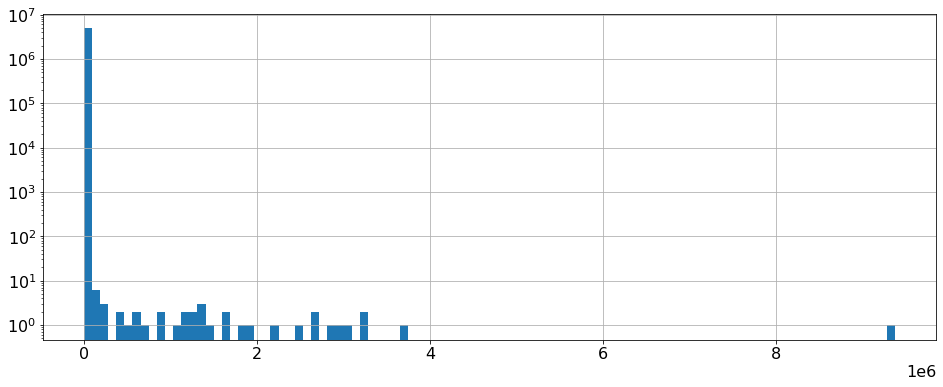

In [5]:
# filter outlieing prices per prop_id
# still some outliers left
mean = df.groupby(['prop_id'])['price_usd'].transform('mean')    
std = df.groupby(['prop_id'])['price_usd'].transform('std')

df = df[abs((df['price_usd'] - mean) / std) < 3]
#df['outlier'] = False
#df.loc[abs((df['price_usd'] - mean) / std) > 3, 'outlier']  = True
df['price_usd'].hist(bins=100, log=True)

<AxesSubplot:>

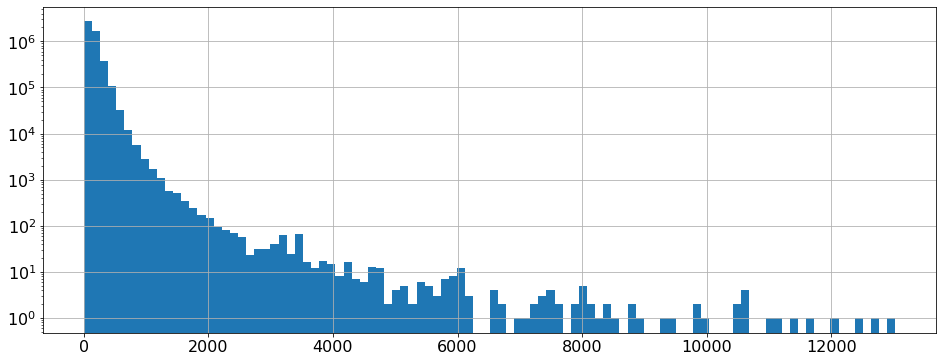

In [6]:
# filter outlieing prices overall
# the limit is around 15.000 USD, above that there is only 1 entry per price bracket -> mistake
# drop rows with prices with std > 2
df = df[stats.zscore(df['price_usd']) < 2]
#df.loc[abs((df['price_usd'] - mean) / std) > 2, 'outlier']  = True

df['price_usd'].hist(bins=100, log=True)

## Train vs Test data

In [6]:
df_stats = pd.DataFrame(index=df.columns)

for col in df.columns:
    df_stats.loc[col, 'train_na'] = df[col].isnull().sum() * 100 / len(df)
    
    if col in df_test.columns:
        df_stats.loc[col, 'test_na'] = df_test[col].isnull().sum() * 100 / len(df_test)
    else:
        df_stats.loc[col, 'test_na'] = np.nan
    
    df_stats.loc[col, 'diff'] = df_stats.loc[col, 'train_na'] - df_stats.loc[col, 'test_na']
df_stats = df_stats.sort_values('train_na', key= lambda x: abs(x), ascending=False)
df_stats = df_stats[df_stats['train_na'] > 1]

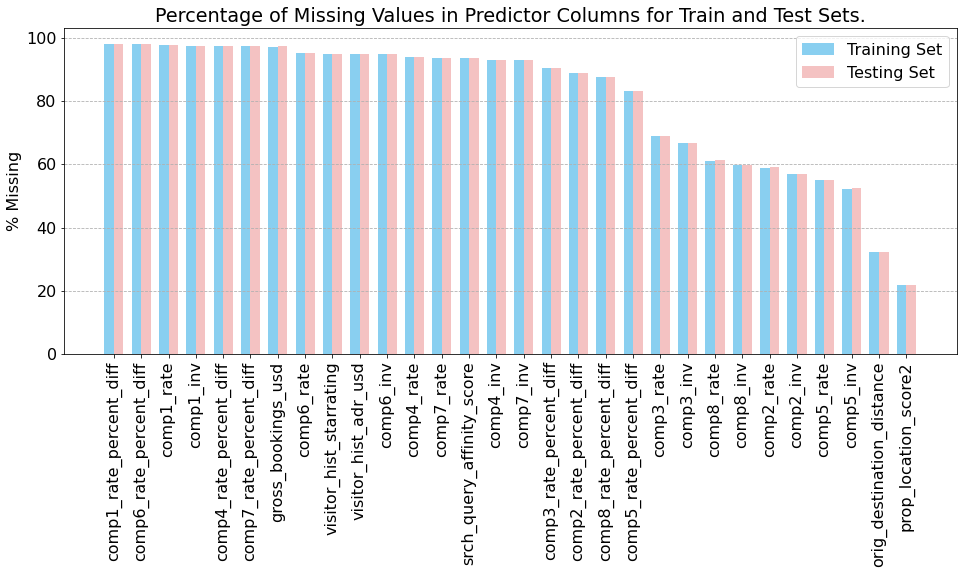

In [61]:
#plt.bar(df_stats.index, df_stats['train_na'])

labels = df_stats.index
men_means = df_stats['train_na']
women_means = df_stats['test_na']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.yaxis.grid(linestyle='--')


rects1 = ax.bar(x - width/2, men_means, width, label='Training Set', color='#89CFF0')
rects2 = ax.bar(x + width/2, women_means, width, label='Testing Set', color='#f4c2c2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Missing')
ax.set_title('Percentage of Missing Values in Predictor Columns for Train and Test Sets.')
ax.set_xticks(x, labels, rotation=90)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()

In [26]:
df_stats.columns

Index(['train_na', 'test_na', 'diff'], dtype='object')

In [7]:
df_stats = pd.DataFrame(index=df_test.columns)

for col in df_test.columns:
    df_stats.loc[col, 'train_mean'] = df[col].mean()
    df_stats.loc[col, 'test_mean'] = df_test[col].mean()
    
    df_stats.loc[col, 'train_min'] = df[col].min()
    df_stats.loc[col, 'test_min'] = df_test[col].min()
    
    df_stats.loc[col, 'train_max'] = df[col].max()
    df_stats.loc[col, 'test_max'] = df_test[col].max()
    
    #df_stats.loc[col, 'diff'] = (df_stats.loc[col, 'train_mean'] - df_stats.loc[col, 'test_mean']) / df_stats.loc[col, 'train_mean']
#df_stats.sort_values('diff', key= lambda x: abs(x), ascending=False)
df_stats

train_mean  \
srch_id                                      166366.561096   
date_time                    2013-03-11 06:19:37.890842880   
site_id                                           9.953133   
visitor_location_country_id                     175.340453   
visitor_hist_starrating                           3.374334   
visitor_hist_adr_usd                            176.022659   
prop_country_id                                 173.973897   
prop_id                                       70079.179496   
prop_starrating                                   3.180525   
prop_review_score                                 3.777777   
prop_brand_bool                                   0.634699   
prop_location_score1                              2.872589   
prop_location_score2                              0.130385   
prop_log_historical_price                         4.317913   
price_usd                                        254.20959   
promotion_flag                                     0.21562   
srch_destination_id                           14042.630393   
srch_length_of_stay                               2.385427   
srch_booking_window                              37.474165   
srch_adults_count                                 1.972637   
srch_children_count                               0.350492   
srch_room_count                                   1.110525   
srch_saturday_night_bool                          0.502213   
srch_query_affinity_score                       -24.146418   
orig_destination_distance                      1301.234406   
random_bool                                         0.2959   
comp1_rate                                        0.479788   
comp1_inv                                         0.031059   
comp1_rate_percent_diff                         244.229916   
comp2_rate                                         0.04419   
comp2_inv                                          0.03931   
comp2_rate_percent_diff                          18.490732   
comp3_rate                                         0.01729   
comp3_inv                                         0.057769   
comp3_rate_percent_diff                          27.071559   
comp4_rate                                       -0.016543   
comp4_inv                                         0.096653   
comp4_rate_percent_diff                         175.316533   
comp5_rate                                        0.022676   
comp5_inv                                         0.051429   
comp5_rate_percent_diff                          29.851903   
comp6_rate                                        0.128329   
comp6_inv                                         0.075957   
comp6_rate_percent_diff                          17.250473   
comp7_rate                                        0.145969   
comp7_inv                                         0.083202   
comp7_rate_percent_diff                          19.433267   
comp8_rate                                       -0.060899   
comp8_inv                                         0.009963   
comp8_rate_percent_diff                          22.430384   

                                                 test_mean  \
srch_id                                      166646.023925   
date_time                    2013-03-11 08:04:25.482636288   
site_id                                           9.979214   
visitor_location_country_id                     175.250352   
visitor_hist_starrating                           3.374933   
visitor_hist_adr_usd                             177.15073   
prop_country_id                                 173.837066   
prop_id                                       70081.112228   
prop_starrating                                   3.182542   
prop_review_score                                 3.777628   
prop_brand_bool                                   0.633909   
prop_location_score1                              2.879367   
prop_location_score2                              0.130453   
prop_log_historic

## Some correlations

In [230]:
def print_corr(col1, col2):
    print('{} : {} \t=\t {}'.format(col1, col2, df[col1].corr(df[col2])))

In [232]:
print_corr('price_usd', 'prop_location_score1')

price_usd : prop_location_score1 	=	 0.11704504485213368


In [233]:
print_corr('promotion_flag', 'position')

promotion_flag : position 	=	 -0.1028026649193634


In [289]:
print_corr('srch_adults_count', 'srch_room_count')

srch_adults_count : srch_room_count 	=	 0.4776574924174766


In [292]:
print_corr('srch_booking_window', 'srch_saturday_night_bool')

srch_booking_window : srch_saturday_night_bool 	=	 -0.08020333216998814


In [327]:
print_corr('srch_booking_window', 'orig_destination_distance')

srch_booking_window : orig_destination_distance 	=	 0.33133820395798086


In [330]:
print_corr('srch_booking_window', 'booking_bool')

srch_booking_window : booking_bool 	=	 -0.016711595813207993


In [380]:
print('Correlations:\n',corr[['booking_bool', 'click_bool']].sort_values(
    by='booking_bool', key=lambda x: abs(x), ascending=False))

Correlations:
                              booking_bool  click_bool
booking_bool                     1.000000    0.774228
click_bool                       0.774228    1.000000
comp2_rate_percent_diff          0.203540    0.186315
position                        -0.121864   -0.134375
comp8_rate_percent_diff          0.121044    0.160762
comp1_rate                       0.090340    0.010049
comp6_inv                        0.083012    0.072368
random_bool                     -0.078662    0.018418
srch_query_affinity_score        0.071530    0.077733
prop_location_score2             0.070355    0.108688
visitor_hist_starrating         -0.060489    0.022805
promotion_flag                   0.058829    0.055433
comp7_rate                       0.058802    0.057772
comp6_rate                       0.057421    0.045254
comp3_rate                       0.050257    0.038371
comp8_rate                       0.049433    0.080898
comp5_rate                       0.046604    0.045525
prop_log_hist

In [358]:
x.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv'

In [354]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df, .5)

comp6_rate                   comp4_inv                   -1.000000
visitor_hist_starrating      comp1_rate_percent_diff     -0.900325
comp6_rate_percent_diff      comp8_rate_percent_diff     -0.889709
comp7_rate_percent_diff      gross_bookings_usd          -0.712027
visitor_hist_adr_usd         comp1_rate_percent_diff     -0.695611
comp8_rate                   comp6_rate                  -0.672243
comp6_rate                   visitor_hist_starrating     -0.659811
comp1_rate_percent_diff      comp4_rate_percent_diff     -0.624823
comp7_inv                    visitor_hist_starrating     -0.621719
comp3_rate_percent_diff      comp1_rate                  -0.601345
comp7_rate                   visitor_hist_starrating     -0.578307
comp3_inv                    comp7_rate                  -0.550149
srch_query_affinity_score    comp6_rate                  -0.536659
comp3_rate_percent_diff      comp6_inv                   -0.523832
comp4_inv                    gross_bookings_usd          -0.50

## Individual Column stats + plots

In [6]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [339]:
print('Lot of missing values for rate comparisons')
df['comp1_rate'].isna().value_counts()

Lot of missing values for rate comparisons


True     4946
False     133
Name: comp1_rate, dtype: int64

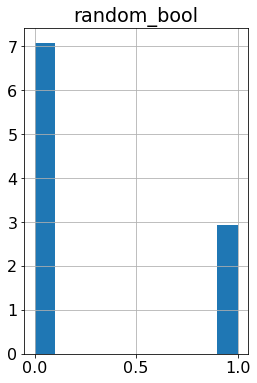

In [336]:
df['random_bool'].hist(density=1, figsize=(4,6))
plt.title('random_bool');

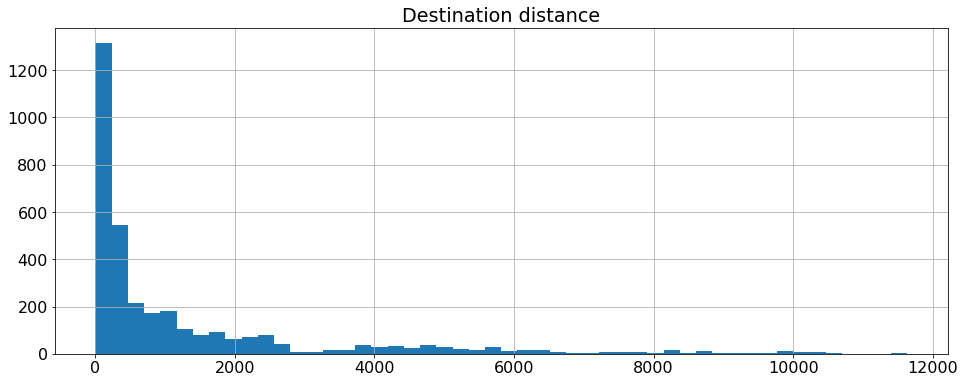

In [326]:
df['orig_destination_distance'].hist(bins=50)
plt.title('Destination distance');

The log of the probability a hotel will be clicked on in Internet searches (hence the values are negative)  A null signifies there are no data (i.e. hotel did not register in any searches)


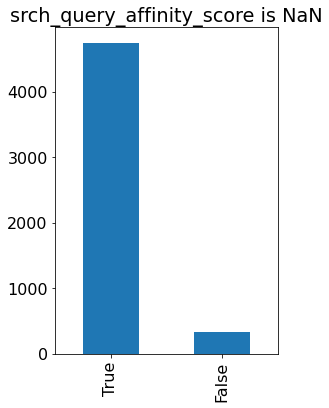

In [313]:
df['srch_query_affinity_score'].isna().value_counts().plot.bar(figsize=(4,6))
plt.title('srch_query_affinity_score is NaN');
print('The log of the probability a hotel will be clicked on in Internet searches (hence the values are negative)  A null signifies there are no data (i.e. hotel did not register in any searches)')

=1 if the stay includes a Saturday night, starts from Thursday with a length of stay is less than or equal to 4 nights (i.e. weekend); otherwise 0


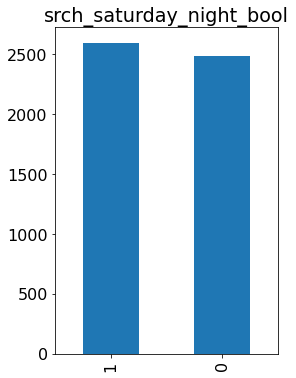

In [309]:
df['srch_saturday_night_bool'].value_counts().plot.bar(figsize=(4,6))
plt.title('srch_saturday_night_bool');
print('=1 if the stay includes a Saturday night, starts from Thursday with a length of stay is less than or equal to 4 nights (i.e. weekend); otherwise 0')

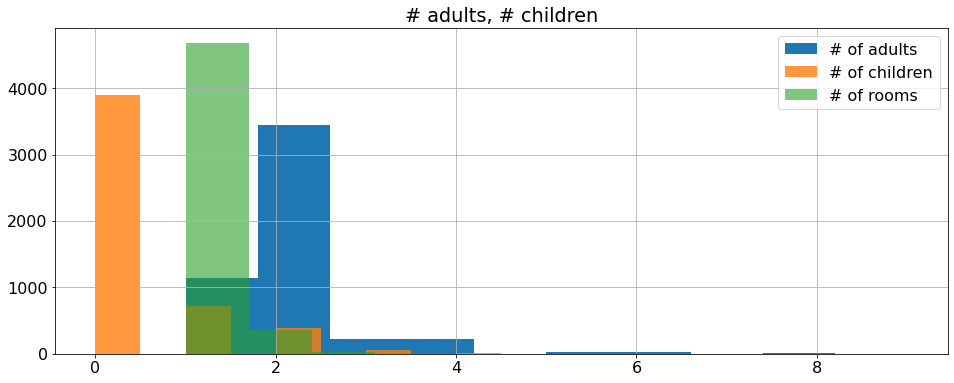

In [290]:
df['srch_adults_count'].hist(label='# of adults')
df['srch_children_count'].hist(alpha=0.8, label='# of children')
df['srch_room_count'].hist(alpha=0.6, label='# of rooms')


plt.legend()
plt.title('# adults, # children');

Many last minute bookings


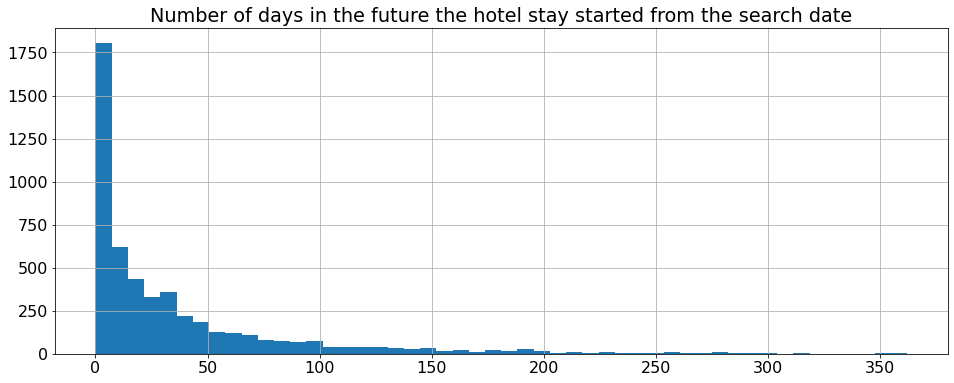

In [274]:
df['srch_booking_window'].hist(bins=50)
plt.title('Number of days in the future the hotel stay started from the search date');
print('Many last minute bookings')

Text(0.5, 1.0, 'Frequency of length of stay')

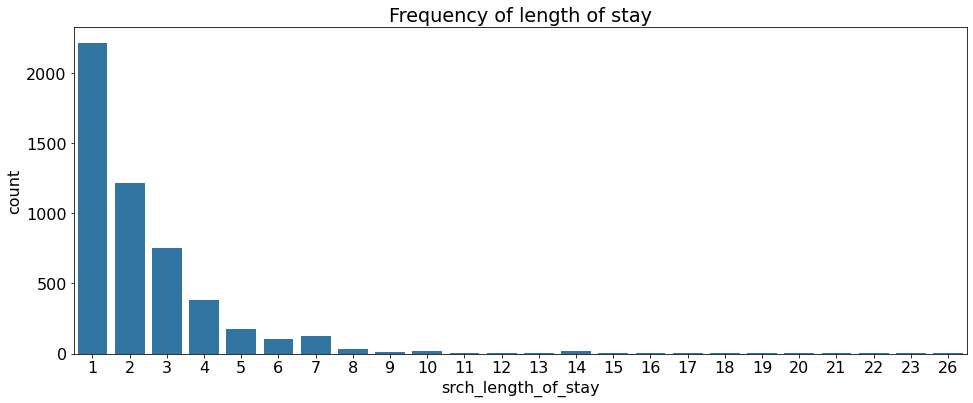

In [262]:
sns.countplot(df['srch_length_of_stay'], color='C0');
plt.title('Frequency of length of stay');

In [252]:
print('# of unique srch_destination_id: ',df['srch_destination_id'].unique().shape)
print('# of unique visitor_location_country_id: ',df['visitor_location_country_id'].unique().shape)
print('# of unique prop_country_id: ',df['prop_country_id'].unique().shape)
print('\nsrch_destination_id probably based on city level')

# of unique srch_destination_id:  (2307,)
# of unique visitor_location_country_id:  (97,)
# of unique prop_country_id:  (103,)

srch_destination_id probably based on city level


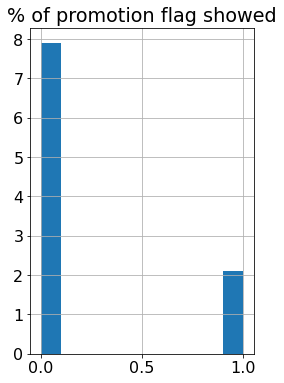

In [220]:
df['promotion_flag'].hist(density=1, figsize=(4,6))
plt.title('% of promotion flag showed');

True     4951
False     128
Name: gross_bookings_usd, dtype: int64

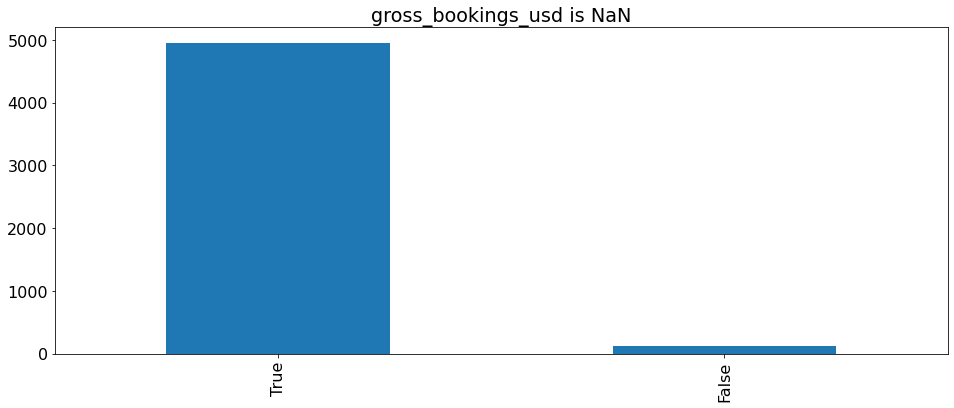

In [200]:
df['gross_bookings_usd'].isna().value_counts().plot.bar()
plt.title('gross_bookings_usd is NaN');
df['gross_bookings_usd'].isna().value_counts()

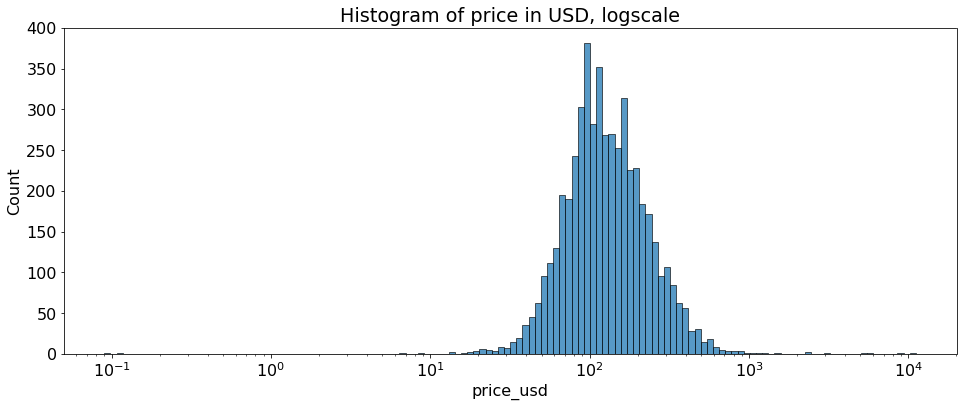

In [172]:
sns.histplot(df['price_usd'], log_scale=True);

plt.title('Histogram of price in USD, logscale');

Some pretty extreme outliers


count     5079.000000
mean       158.328358
std        252.363229
min          0.090000
25%         86.210000
50%        123.000000
75%        185.705000
max      11149.000000
Name: price_usd, dtype: float64

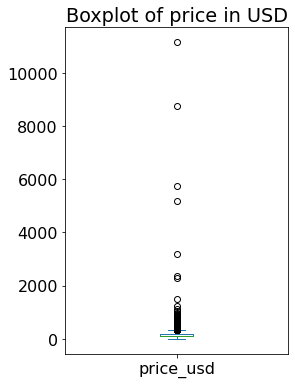

In [159]:
df['price_usd'].plot.box(figsize=(4,6));
print('Some pretty extreme outliers')
plt.title('Boxplot of price in USD');
df['price_usd'].describe()

WTF?


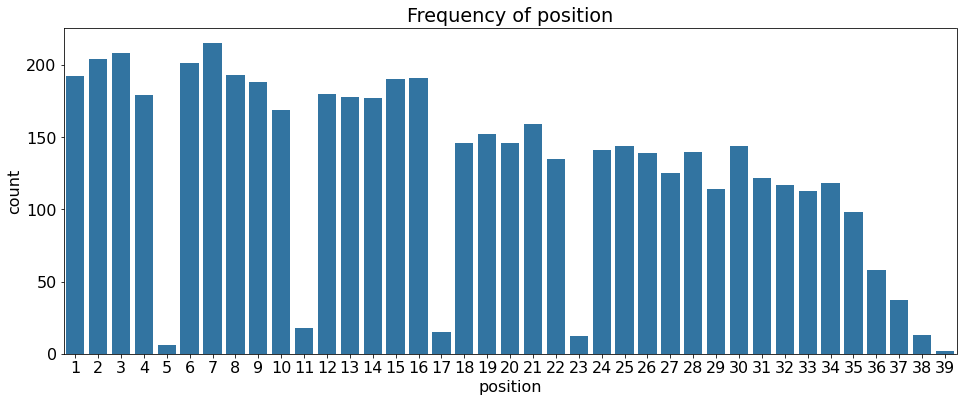

In [139]:
sns.countplot(df['position'], color='C0');
print('WTF?')
plt.title('Frequency of position');

They have different scales 
score1: 0-7
score2: 0-1


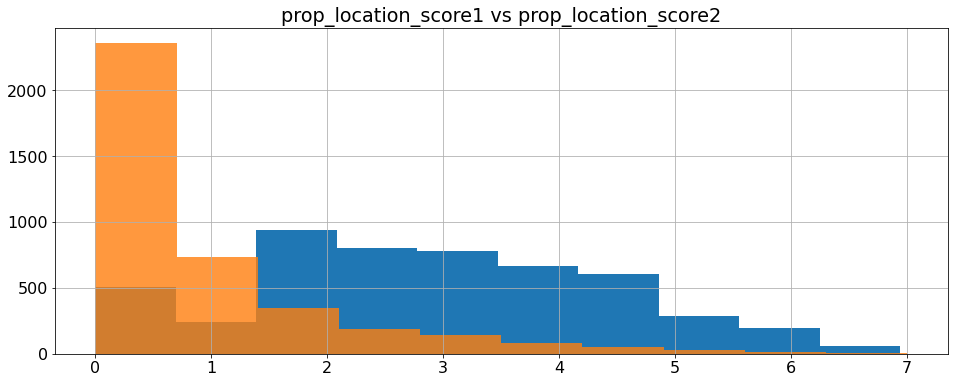

In [104]:
df['prop_location_score1'].hist()
(df['prop_location_score2']*7).hist(alpha=0.8)
plt.title('prop_location_score1 vs prop_location_score2');
print('They have different scales \nscore1: 0-7\nscore2: 0-1')

~60% of hotels belongs to hotel chain


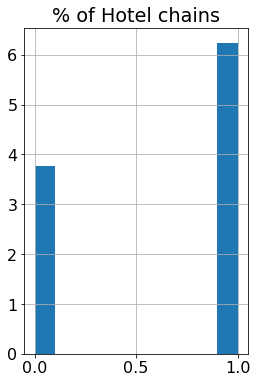

In [153]:
df['prop_brand_bool'].hist(density=1, figsize=(4,6));
print('~60% of hotels belongs to hotel chain')
plt.title('% of Hotel chains');

Star Rating of 1 is super rare
Pretty large positive shift from star rating to review score
How prominent are these features?


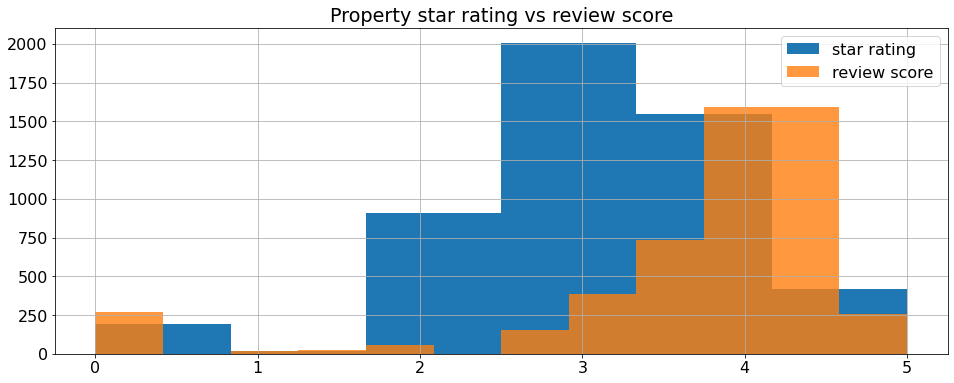

In [95]:
print('Star Rating of 1 is super rare')
print('Pretty large positive shift from star rating to review score')
print('How prominent are these features?')

df['prop_starrating'].hist(bins=6, label='star rating');
df['prop_review_score'].hist(bins=12, label='review score', alpha=0.8);
plt.legend();
plt.title('Property star rating vs review score');

Frequency of USD spent by users with history  AxesSubplot(0.125,0.125;0.775x0.755)


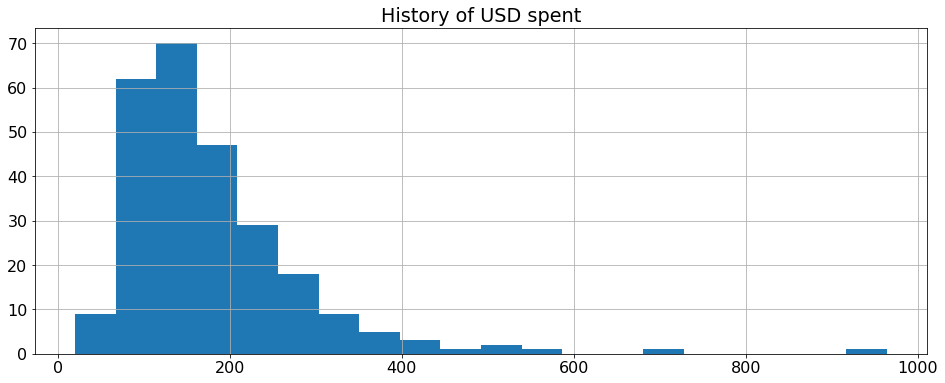

In [94]:
print('Frequency of USD spent by users with history ',
df[~df['visitor_hist_adr_usd'].isna()]['visitor_hist_adr_usd'].hist(bins=20))
plt.title('History of USD spent');

In [206]:
print('History unavailable for {}% of the data'.format(
round(df[df['visitor_hist_starrating'].isna()].shape[0] / df.shape[0] * 100)))

History unavailable for 95% of the data


In [67]:
df['prop_country_id'].unique().shape

(103,)

To which countries do these id refer to??
The IDs appear to be consistent for these columns


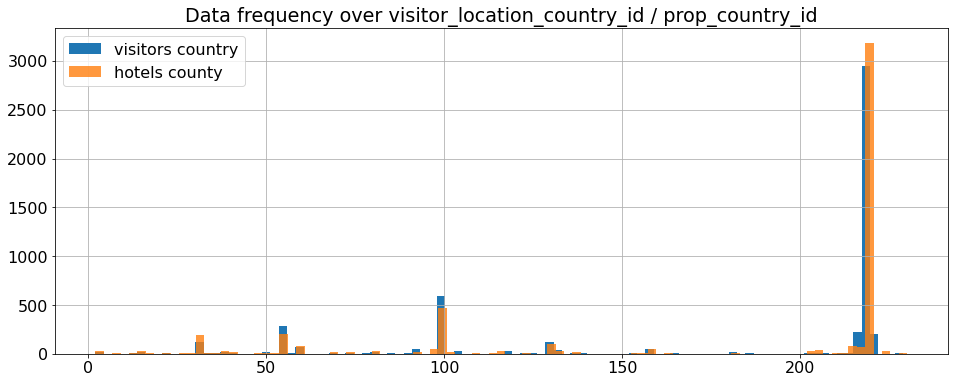

In [78]:
df['visitor_location_country_id'].hist(label='visitors country', bins=97);
plt.title('Data frequency over visitor_location_country_id / prop_country_id');
df['prop_country_id'].hist(label='hotels county', alpha=0.8, bins=97);
plt.legend()
print('To which countries do these id refer to??')
print('The IDs appear to be consistent for these columns')

To which countries do these id refer to??


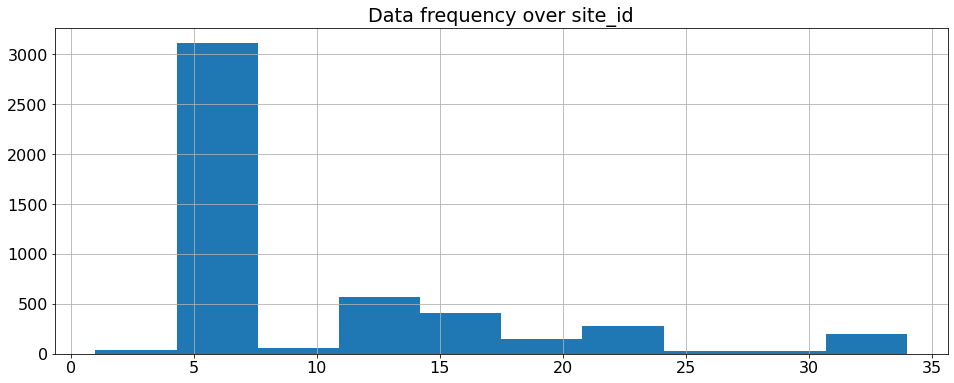

In [190]:
df['site_id'].hist();
plt.title('Data frequency over site_id')
print('To which countries do these id refer to??')

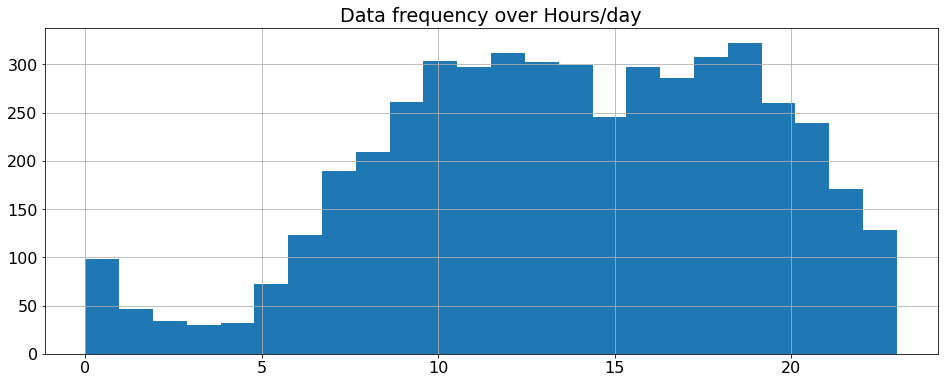

In [189]:
df['date_time'].dt.hour.hist(bins=24);
plt.title('Data frequency over Hours/day');

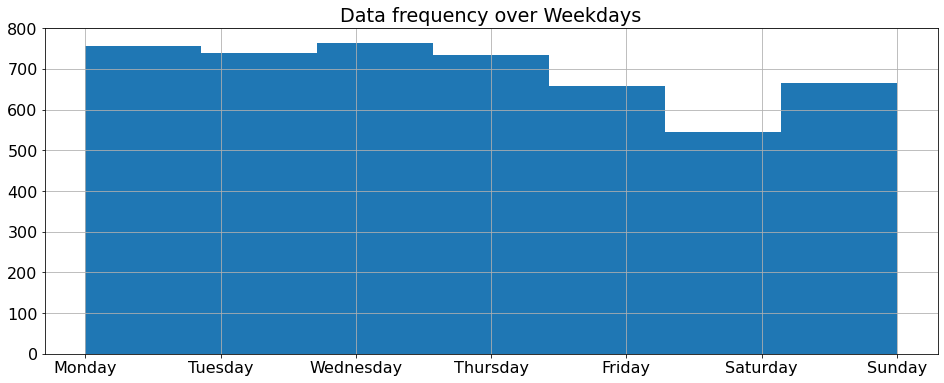

In [188]:
df['date_time'].dt.weekday.hist(bins=7);
plt.xticks(range(0,7), [calendar.day_name[num] for num in range(0,7)]);
plt.title('Data frequency over Weekdays');

Data only for months:  Jan Feb Mar Apr May Jun Nov Dec


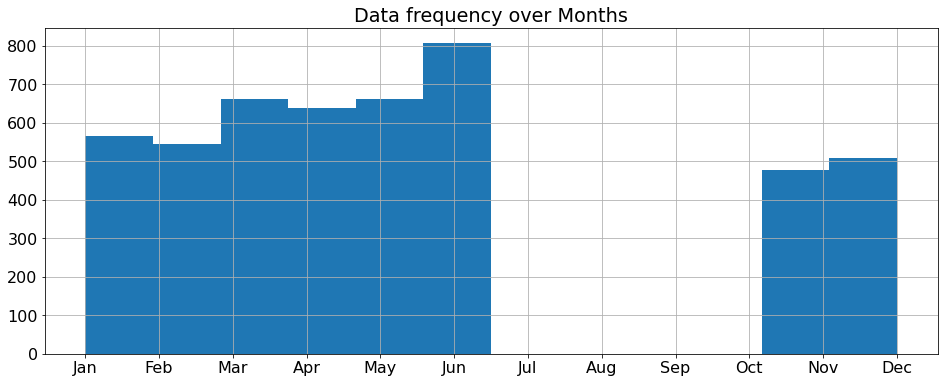

In [186]:
print('Data only for months: ', *df['date_time'].dt.month.sort_values().apply(lambda x: calendar.month_abbr[x]).unique())
df['date_time'].dt.month.hist(bins=12);
plt.xticks(range(1,13), [calendar.month_abbr[num] for num in range(1,13)]);
plt.title('Data frequency over Months');


Number of samples during time period fairly constant


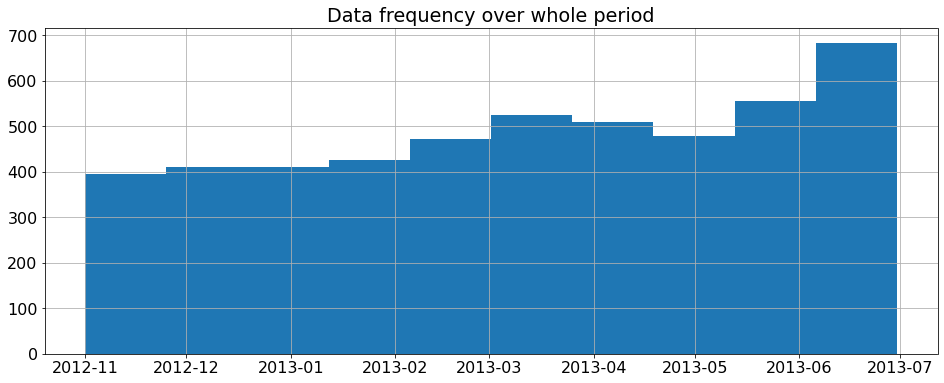

In [187]:
df['date_time'].dt.floor('D').hist();
print('Number of samples during time period fairly constant')
plt.title('Data frequency over whole period');



In [42]:
print('Data ranges from {} until {}'.format(
df['date_time'].min(), df['date_time'].max()))

Data ranges from 2012-11-01 06:14:59 until 2013-06-30 23:57:52


In [16]:
# num of individual searches
print('Number of individual searches: ', df['srch_id'].unique().shape[0])

Number of individual searches:  199795


## Lot of missing values in certain columns

Text(0, 0.5, 'Missing values %')

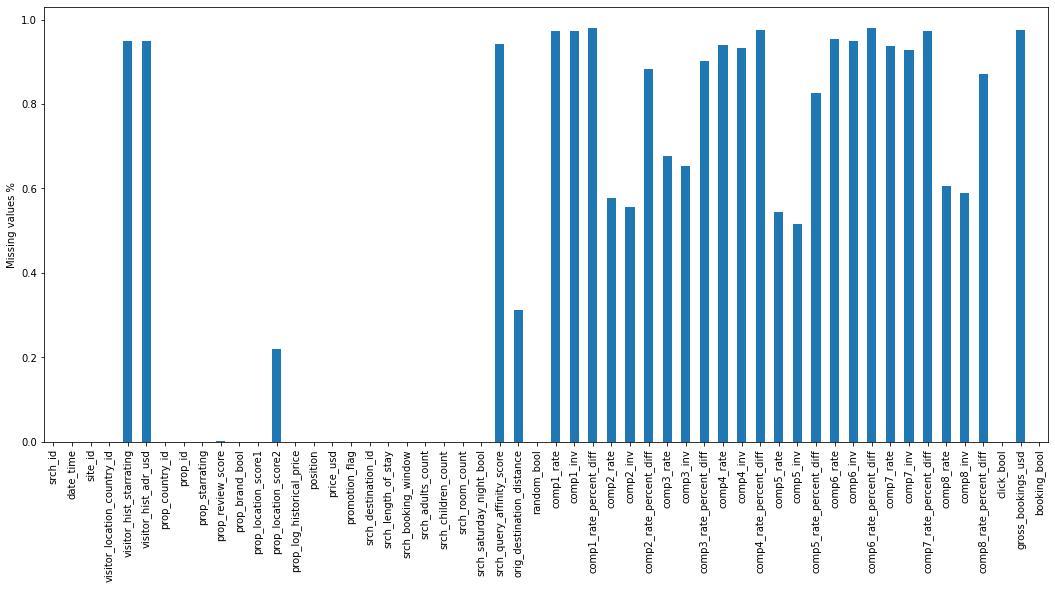

In [48]:
(df.isna().sum() / df.shape[0]).plot.bar(figsize=(18,8))
plt.ylabel('Missing values %')


## Correlations

These columns seem to be correlated with some other features:\
visitor_hist_starring\
visitor_hist_adr_usd\
srch_query_affinity_score\
gross_booking_usd\
\
Only click_bool seems to be correlated with the target (booking_bool)

<AxesSubplot:>

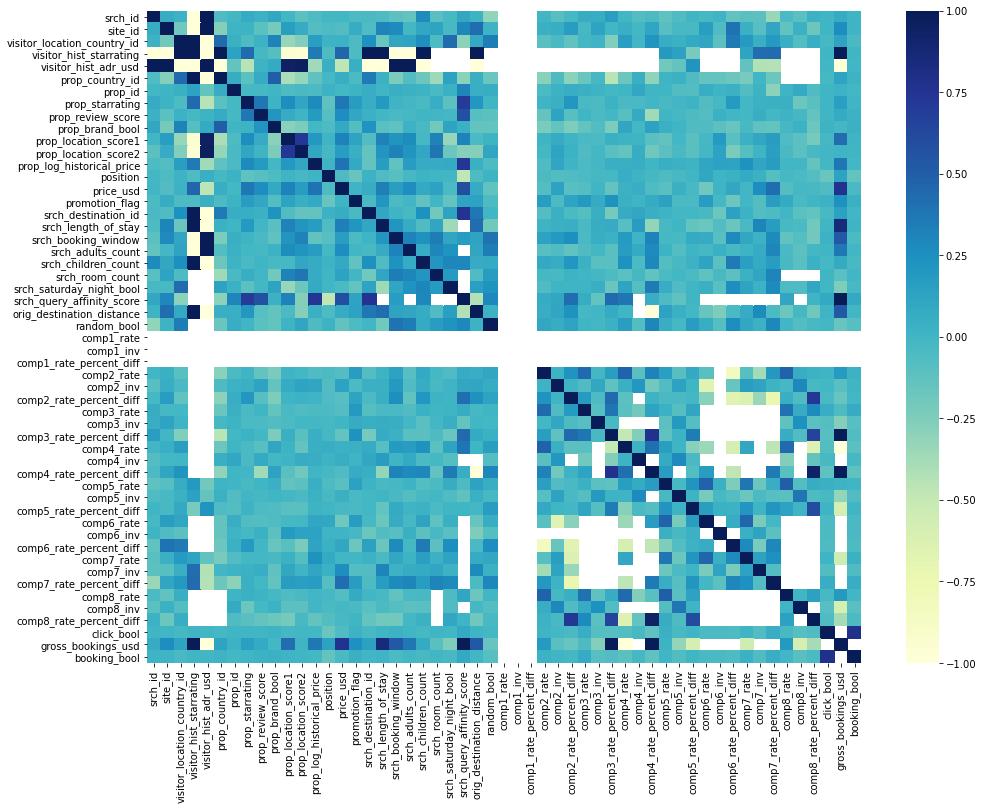

In [34]:
corr = df.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

## Highly unbalanced target

might have to adjust training data\
or create a weighted loss function 

<AxesSubplot:>

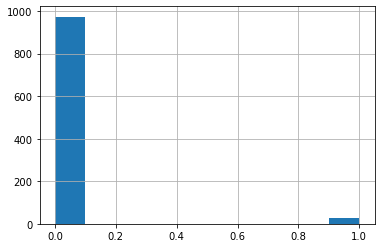

In [43]:
df['booking_bool'].hist()

## File shapes

In [39]:
df.shape

(4958347, 54)

In [41]:
pd.read_csv('data/test_set_VU_DM.csv').shape

(4959183, 50)

In [42]:
pd.read_csv('data/submission_sample.csv').shape

(4959183, 2)

1. we predict on the test file
2. wtf train is the same shape as test

## How many predictions

In [18]:
%matplotlib inline
df.groupby('srch_id')[['prop_id', 'position']].count()#.hist()

prop_id  position
srch_id                   
1             28        28
4             32        32
6              5         5
8             21        21
11            33        33
...          ...       ...
332777        32        32
332781        15        15
332782        24        24
332784        28        28
332785         6         6

[199795 rows x 2 columns]

at least 5 we have. we have proposed hotels and they are ordered 

In [24]:
df.groupby('srch_id')['position'].apply(list).apply(sorted)#.hist()

srch_id
1         [1, 2, 3, 4, 6, 7, 8, 10, 12, 13, 15, 18, 19, ...
4         [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
6                                           [1, 2, 3, 4, 6]
8         [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
11        [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
                                ...                        
332777    [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
332781    [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
332782    [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
332784    [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
332785                                   [1, 2, 3, 4, 6, 7]
Name: position, Length: 199795, dtype: object

## Time

In [25]:
df['date_time'].agg([min, max])

min    2012-11-01 00:08:29
max    2013-06-30 23:58:24
Name: date_time, dtype: object

In [26]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['date_time'].agg([min, max])

min   2012-11-01 00:08:29
max   2013-06-30 23:58:24
Name: date_time, dtype: datetime64[ns]

In [27]:
time_df = df.drop_duplicates(['srch_id', 'date_time'])['date_time']
time_df.head()

0    2013-04-04 08:32:15
28   2012-12-31 08:59:22
60   2013-06-05 12:27:51
65   2013-03-20 17:50:44
86   2013-02-25 08:39:33
Name: date_time, dtype: datetime64[ns]

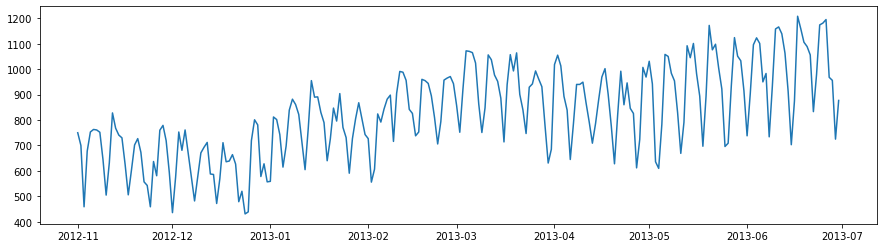

In [38]:
plt.figure(figsize=(15, 4));
time_df.dt.date.value_counts().plot();

test is in the same time period as train. maybe time-series CV is not needed?

## Some Hotels use price/day, other use price/trip
Try to find what price hotels showed

In [181]:
# calculate difference between gross_bookings_usd and price_usd
# also calculate difference between gross_bookings_usd and srch_length_of_stay * price_usd

df['gross_price_diff'] = df['gross_bookings_usd'] - df['price_usd']
df['adj_price_diff'] = df['gross_bookings_usd'] - (df['srch_length_of_stay'] * df['price_usd'])

In [182]:
# price_usd is likely given per day here
df[(~df['gross_price_diff'].isna()) & (df['srch_length_of_stay'] > 1) & (df['adj_price_diff'] < 0)][
    ['srch_length_of_stay','price_usd', 'gross_bookings_usd', 'gross_price_diff', 'adj_price_diff']]

srch_length_of_stay  price_usd  gross_bookings_usd  gross_price_diff  \
2919                       2     124.00              165.89             41.89   
3443                       2     256.00              496.17            240.17   
7549                       4     199.21              789.39            590.18   
9327                       3     159.00              201.16             42.16   
9463                       2     110.00               96.81            -13.19   
...                      ...        ...                 ...               ...   
4955111                    2      66.00              131.02             65.02   
4956338                    2     122.75              244.98            122.23   
4956934                    4      84.00              286.11            202.11   
4957005                    9      43.00              383.40            340.40   
4957238                    5     233.00             1164.40            931.40   

         adj_price_diff  
2919             -82.11  
3443             -15.83  
7549              -7.45  
9327            -275.84  
9463            -123.19  
...                 ...  
4955111           -0.98  
4956338           -0.52  
4956934          -49.89  
4957005           -3.60  
4957238           -0.60  

[5947 rows x 5 columns]

In [183]:
# price is given per day if srch_length_of_stay * price_usd is closer to gross_bookings_usd than
# price_usd

df['price_per_day_given'] = abs(df['adj_price_diff']) < abs(df['gross_price_diff'])

In [184]:
# some examples where price is given per day (minority of the cases)
df[(~df['gross_price_diff'].isna()) & (df['srch_length_of_stay'] > 1) & (df['adj_price_diff'] < 0)][
    ['srch_length_of_stay','price_usd', 'gross_bookings_usd', 'gross_price_diff', 'adj_price_diff', 'price_per_day_given']]



srch_length_of_stay  price_usd  gross_bookings_usd  gross_price_diff  \
2919                       2     124.00              165.89             41.89   
3443                       2     256.00              496.17            240.17   
7549                       4     199.21              789.39            590.18   
9327                       3     159.00              201.16             42.16   
9463                       2     110.00               96.81            -13.19   
...                      ...        ...                 ...               ...   
4955111                    2      66.00              131.02             65.02   
4956338                    2     122.75              244.98            122.23   
4956934                    4      84.00              286.11            202.11   
4957005                    9      43.00              383.40            340.40   
4957238                    5     233.00             1164.40            931.40   

         adj_price_diff  price_per_day_given  
2919             -82.11                False  
3443             -15.83                 True  
7549              -7.45                 True  
9327            -275.84                False  
9463            -123.19                False  
...                 ...                  ...  
4955111           -0.98                 True  
4956338           -0.52                 True  
4956934          -49.89                 True  
4957005           -3.60                 True  
4957238           -0.60                 True  

[5947 rows x 6 columns]

In [185]:
# drop columns that helped creating price_per_day and price_per_trip but are not useful anymore

df.drop(['gross_price_diff', 'adj_price_diff'], axis=1, inplace=True)

In [186]:
# only prop_id is correlated with price_per_day_given, other columns did not give good results
# so we find the prop_id that use price per day

df1 = df.groupby('prop_id')['price_per_day_given'].mean()
prop_id_with_price_per_day = df1[df1 > 0.5].index

prop_id_with_price_per_day

Int64Index([    27,    826,   1314,   2102,   2264,   2677,   3669,   3830,
              3894,   4668,
            ...
            136110, 136260, 137001, 137074, 137128, 137284, 137314, 138304,
            140706, 140794],
           dtype='int64', name='prop_id', length=211)

This list of properties is used for feature engineering, the features price_per_day and price_per_trip are calculated based on this list

## Calculate date of trip
from: date_time + srch_booking_window\
until: date_time + srch_booking_window + srch_length_of_stay

In [188]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [189]:
df['date'] = df['date_time'].dt.floor('D')

In [190]:
df['days_until_trip'] = pd.to_timedelta(df['srch_booking_window'], unit='D')

In [191]:
df['start_date'] = df['date'] + df['days_until_trip']
df['end_date'] = df['date'] + df['days_until_trip'] + pd.to_timedelta(df['srch_length_of_stay'], unit='D')

In [192]:
#df['trip_date_range'] = df.apply(lambda x: pd.date_range(start=x['start_date'], end=x['end_date']), axis=1)

## Find holidays (work free day)

In [193]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [194]:
cal = calendar()
holidays = cal.holidays(start=min(df['start_date']), end=max(df['end_date']))

df['holiday'] = 0

for holiday in holidays:
    df['holiday'] += (df['start_date'] <= holiday) & (df['end_date'] >= holiday)
df

srch_id           date_time  site_id  visitor_location_country_id  \
0              1 2013-04-04 08:32:15       12                          187   
1              1 2013-04-04 08:32:15       12                          187   
2              1 2013-04-04 08:32:15       12                          187   
3              1 2013-04-04 08:32:15       12                          187   
4              1 2013-04-04 08:32:15       12                          187   
...          ...                 ...      ...                          ...   
4958342   332785 2013-06-30 19:55:18        5                          219   
4958343   332785 2013-06-30 19:55:18        5                          219   
4958344   332785 2013-06-30 19:55:18        5                          219   
4958345   332785 2013-06-30 19:55:18        5                          219   
4958346   332785 2013-06-30 19:55:18        5                          219   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
0                            NaN                   NaN              219   
1                            NaN                   NaN              219   
2                            NaN                   NaN              219   
3                            NaN                   NaN              219   
4                            NaN                   NaN              219   
...                          ...                   ...              ...   
4958342                      NaN                   NaN              219   
4958343                      NaN                   NaN              219   
4958344                      NaN                   NaN              219   
4958345                      NaN                   NaN              219   
4958346                      NaN                   NaN              219   

         prop_id  prop_starrating  prop_review_score  ...  \
0            893                3                3.5  ...   
1          10404                4                4.0  ...   
2          21315                3                4.5  ...   
3          27348                2                4.0  ...   
4          29604                4                3.5  ...   
...          ...              ...                ...  ...   
4958342    77700                3                4.0  ...   
4958343    88083                3                4.0  ...   
4958344    94508                3                3.5  ...   
4958345   128360                3                5.0  ...   
4958346   134949                3                2.5  ...   

         comp8_rate_percent_diff  click_bool  gross_bookings_usd  \
0                            NaN           0                 NaN   
1                            NaN           0                 NaN   
2                            NaN           0                 NaN   
3                            5.0           0                 NaN   
4                            NaN           0                 NaN   
...                          ...         ...                 ...   
4958342                      NaN           0                 NaN   
4958343                      NaN           0                 NaN   
4958344                      NaN           0                 NaN   
4958345                      NaN           1              157.84   
4958346                      NaN           0                 NaN   

         booking_bool  price_per_day_given       date  days_until_trip  \
0                   0                False 2013-04-04           0 days   
1                   0                False 2013-04-04           0 days   
2                   0                False 2013-04-04           0 days   
3                   0                False 2013-04-04           0 days   
4                   0                False 2013-04-04           0 days   
...               ...                  ...        ...              ...   
4958342             0                False 2013-06-30          21 days   
4958343             0        

In [195]:
holidays

DatetimeIndex(['2012-11-12', '2012-11-22', '2012-12-25', '2013-01-01',
               '2013-01-21', '2013-02-18', '2013-05-27', '2013-07-04',
               '2013-09-02', '2013-10-14', '2013-11-11', '2013-11-28',
               '2013-12-25', '2014-01-01', '2014-01-20', '2014-02-17',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13'],
              dtype='datetime64[ns]', freq=None)

In [196]:
max(df['holiday'])

3

<AxesSubplot:xlabel='holiday'>

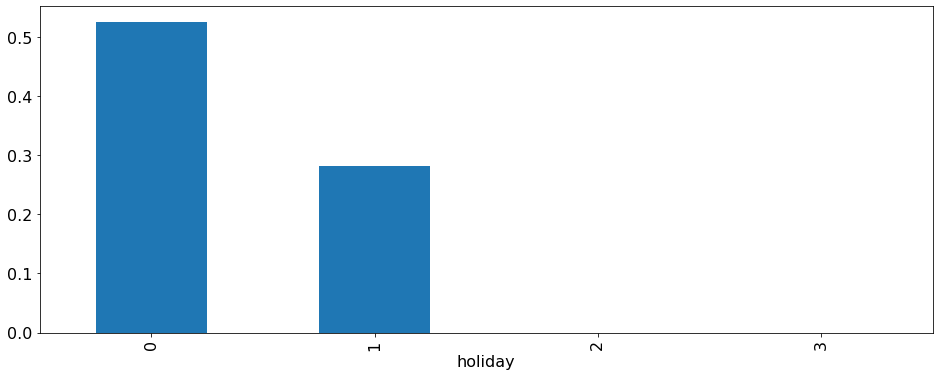

In [197]:
df.groupby('holiday')['srch_saturday_night_bool'].mean().plot.bar()

<AxesSubplot:xlabel='holiday'>

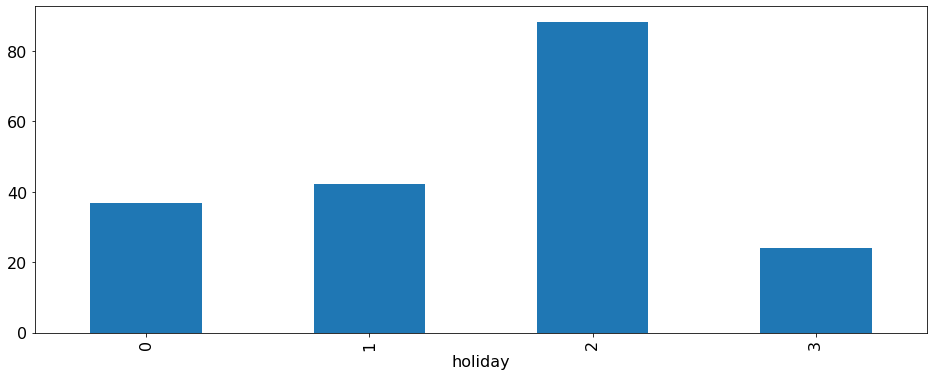

In [198]:
df.groupby('holiday')['srch_booking_window'].mean().plot.bar()

<AxesSubplot:xlabel='holiday'>

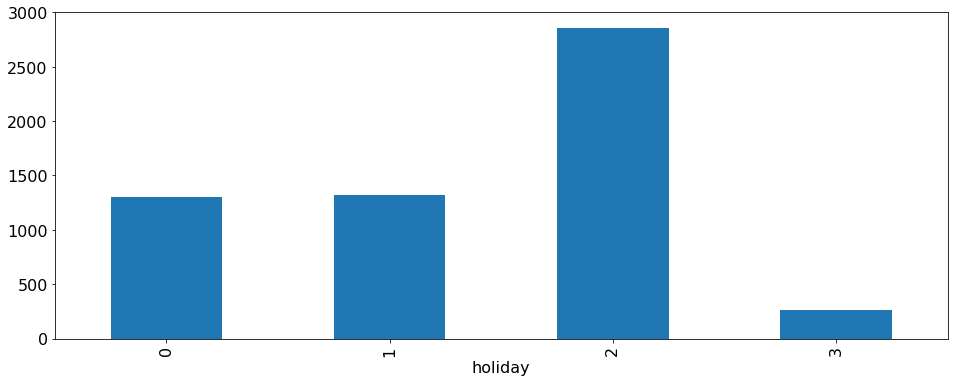

In [199]:
df.groupby('holiday')['orig_destination_distance'].mean().plot.bar()

## Try to separate business trips from holidays

sign for worktrip:\
srch_children_count = 0\
srch_adults_count = 1\
srch_saturday_night_bool = False\
srch_length_of_stay < avg\
orig_destination_distance < avg\
srch_booking_window < avg

In [200]:
# estimate business trips based on:
# srch_children_count = 0
# srch_adults_count = 1
# srch_saturday_night_bool = False
df['business_trip'] = False
df.loc[(df['srch_children_count'] == 0) & (df['srch_adults_count'] == 1) & 
       (~df['srch_saturday_night_bool']) & (df['srch_length_of_stay'] <= 5), 'business_trip'] = True

<AxesSubplot:xlabel='business_trip'>

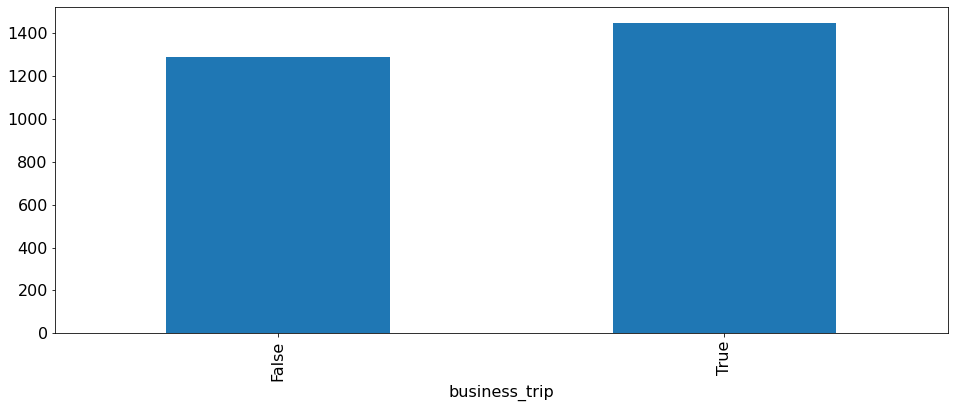

In [201]:
df.groupby('business_trip')['orig_destination_distance'].mean().plot.bar()

<AxesSubplot:xlabel='business_trip'>

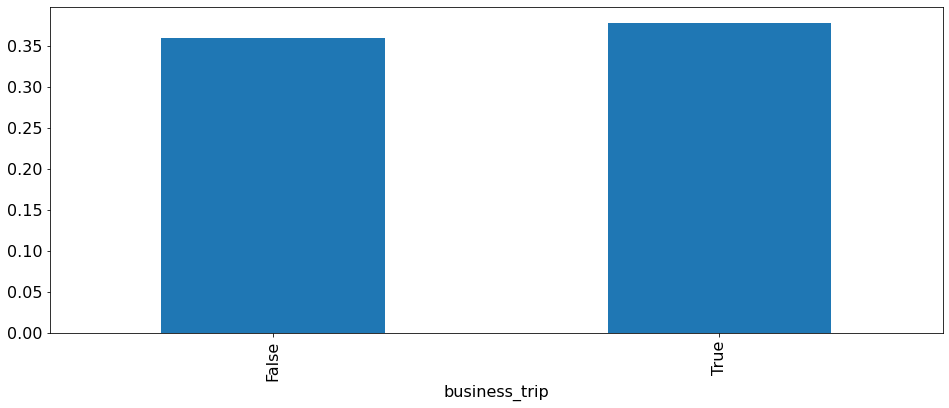

In [202]:
df['travel_abroad'] = df['visitor_location_country_id'] != df['prop_country_id']
df.groupby('business_trip')['travel_abroad'].mean().plot.bar()

<AxesSubplot:xlabel='business_trip'>

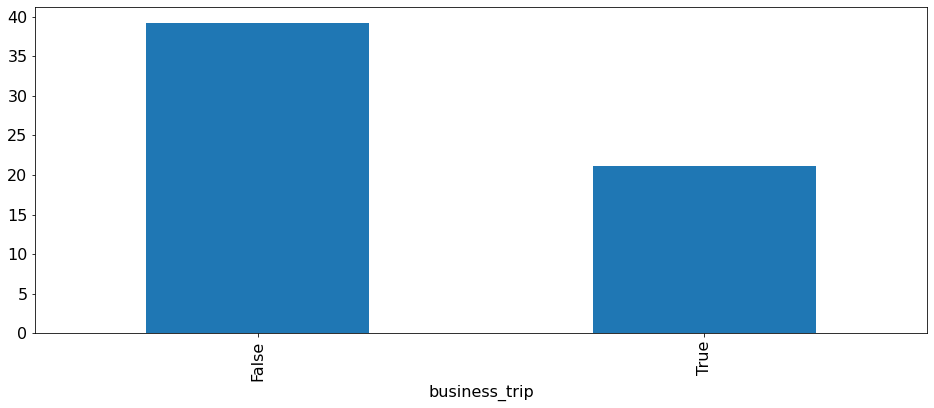

In [203]:
# as expected the search booking window (how many days in advance is much shorter for business trips)
df.groupby('business_trip')['srch_booking_window'].mean().plot.bar()

<AxesSubplot:xlabel='business_trip'>

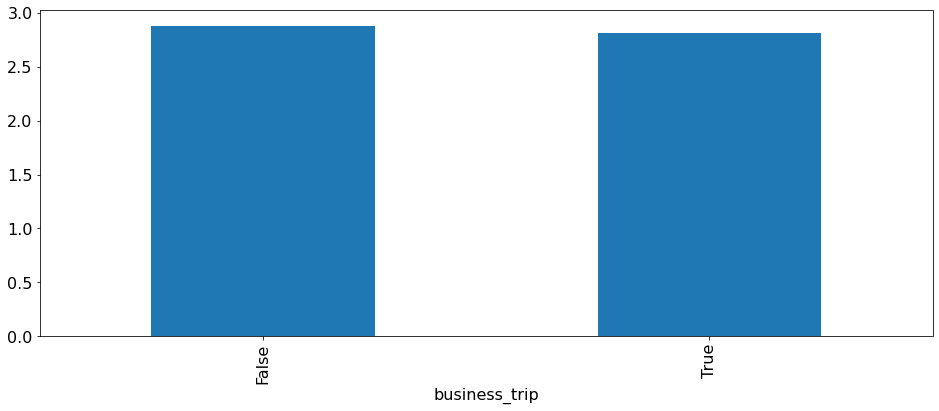

In [204]:
# prop_location_score1 and prop_location_score2 score do not seem to be corelated with business trips 
# (i.e. distance to airport)
df.groupby('business_trip')['prop_location_score1'].mean().plot.bar()
df.groupby('business_trip')['prop_location_score2'].mean().plot.bar()

<AxesSubplot:xlabel='rounded_prop_location_score1'>

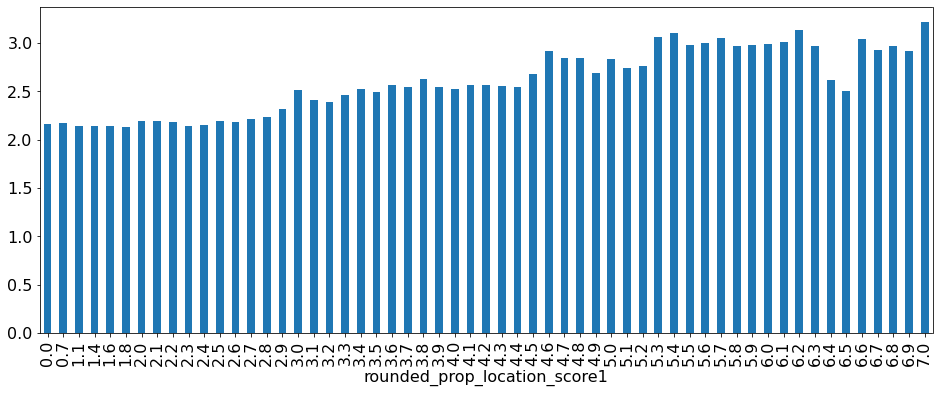

In [205]:
# a high prop_location_score1 probably means holiday
df['rounded_prop_location_score1'] = df['prop_location_score1'].round(1)
df.groupby('rounded_prop_location_score1')['srch_length_of_stay'].mean().plot.bar()

## Hotels with missing description

#### Missing prop_review_score

In [239]:
df['prop_review_score'].fillna(-1, inplace=True)

<AxesSubplot:xlabel='prop_review_score'>

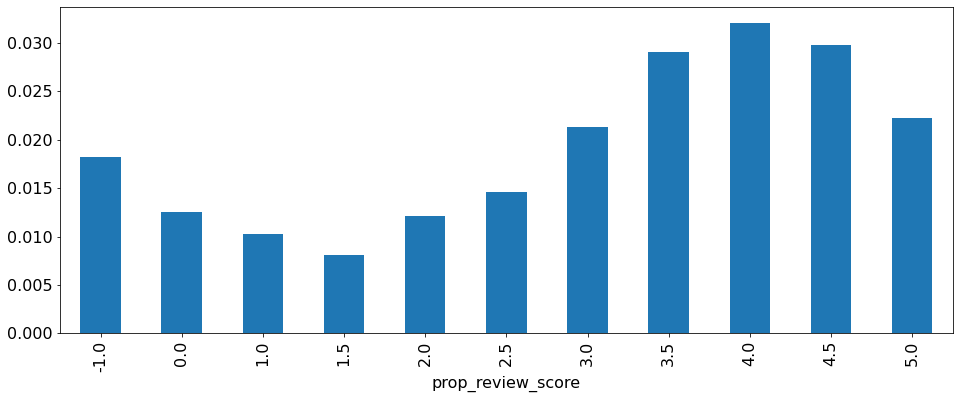

In [240]:
df.groupby('prop_review_score')['booking_bool'].mean().plot.bar()

## Correlations with booking_bool

<AxesSubplot:xlabel='prop_starrating'>

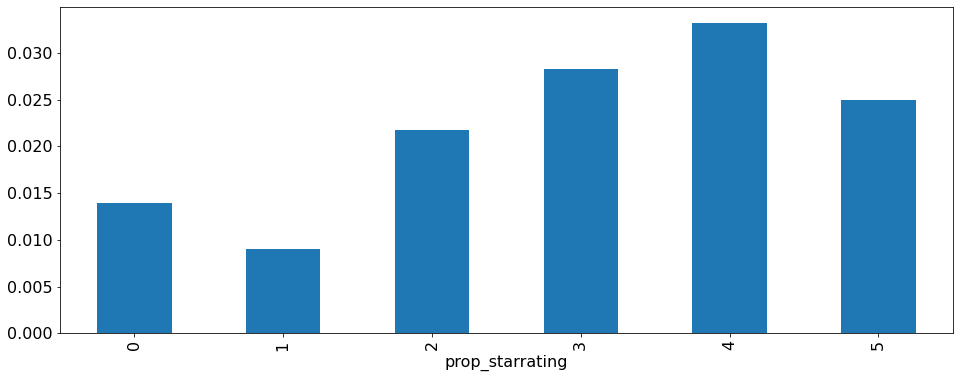

In [241]:
df.groupby('prop_starrating')['booking_bool'].mean().plot.bar()

<AxesSubplot:xlabel='random_bool'>

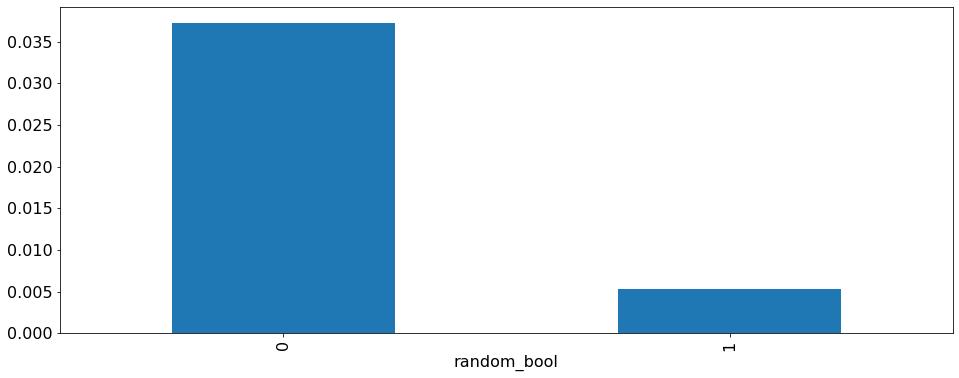

In [242]:
df.groupby('random_bool')['booking_bool'].mean().plot.bar()

<AxesSubplot:xlabel='comp1_inv'>

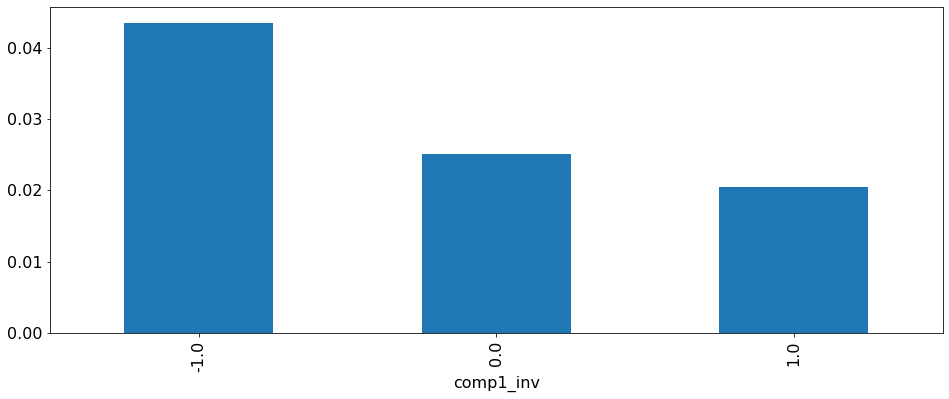

In [243]:
df.groupby('comp1_inv')['booking_bool'].mean().plot.bar()

In [244]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [271]:
comp_rate_cols = ['comp' +str(i)+ '_rate' for i in range(1,9)]
comp_inv_cols = ['comp' +str(i)+ '_inv' for i in range(1,9)]

In [283]:
df['comp_rate_mean'] = df[comp_rate_cols].mean(axis=1)
df['comp_rate_min'] = df[comp_rate_cols].min(axis=1) # i.e. Expedia is the cheapest (1: yes, 0: other same, -1: other cheaper)
df['comp_rate_max'] = df[comp_rate_cols].max(axis=1) # i.e. Expedia is cheaper than at least 1 other (1: yes, 0: other same, -1: all other cheaper)

<AxesSubplot:xlabel='comp_rate_min'>

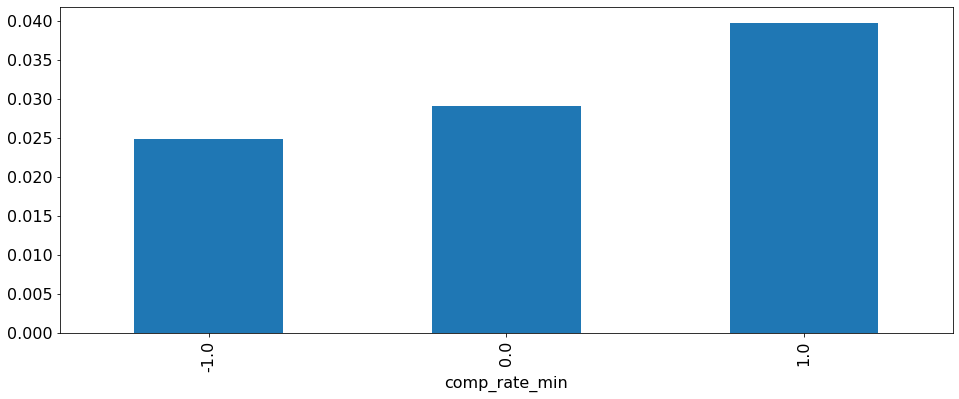

In [304]:
# Best aggregation for comp rates: min (i.e. Expedia is the cheapest
df.groupby('comp_rate_min')['booking_bool'].mean().plot.bar()

<AxesSubplot:xlabel='comp_rate_max'>

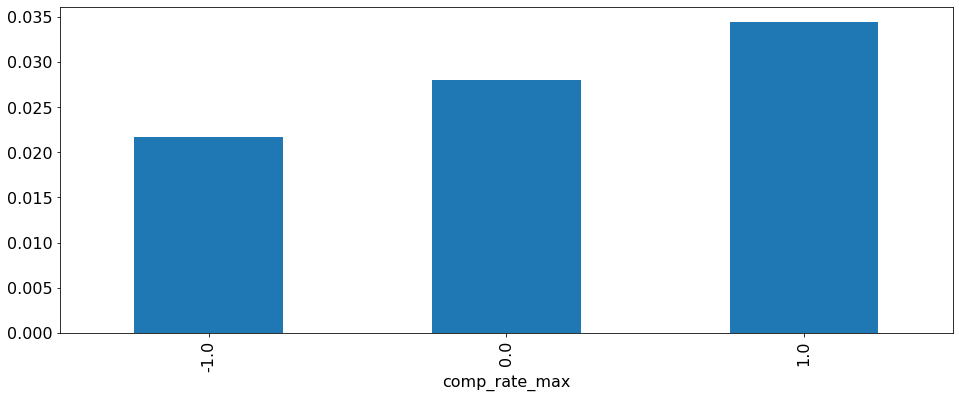

In [285]:
df.groupby('comp_rate_max')['booking_bool'].mean().plot.bar()

In [299]:
df['comp_inv_mean'] = df[comp_inv_cols].mean(axis=1)
df['comp_inv_min'] = df[comp_inv_cols].min(axis=1) # i.e. only Expedia has availability  (1: yes, 0: no, -1: error)
df['comp_inv_max'] = df[comp_inv_cols].max(axis=1) # i.e. Expedia has availability and 1 other site does not  (1: yes, 0: no, -1: error)

<AxesSubplot:xlabel='comp_inv_min'>

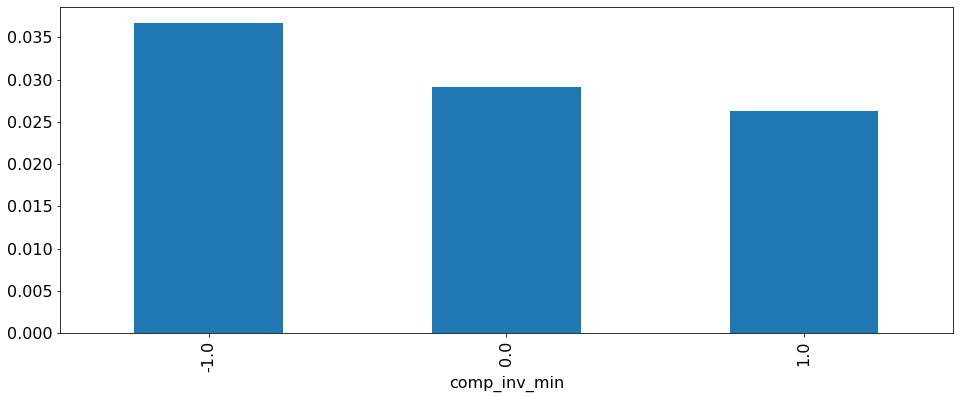

In [302]:
df.groupby('comp_inv_min')['booking_bool'].mean().plot.bar()

<AxesSubplot:>

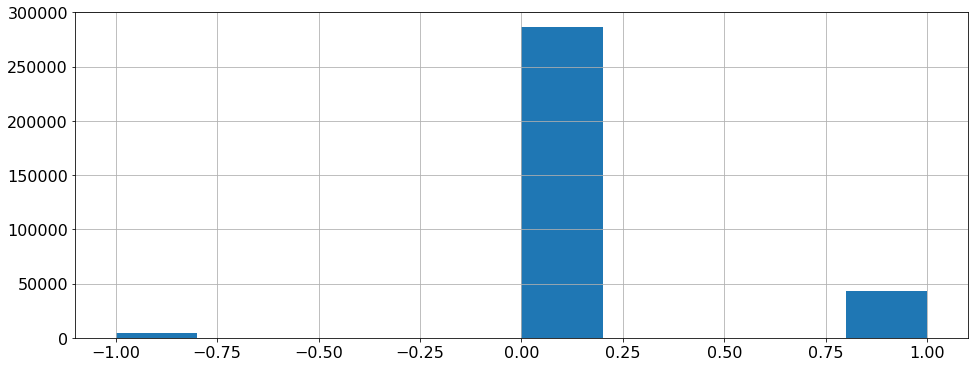

In [303]:
df['comp_inv_max'].hist()

## Correlation between srch_query_affinity_score and click_bool

<AxesSubplot:xlabel='click_bool'>

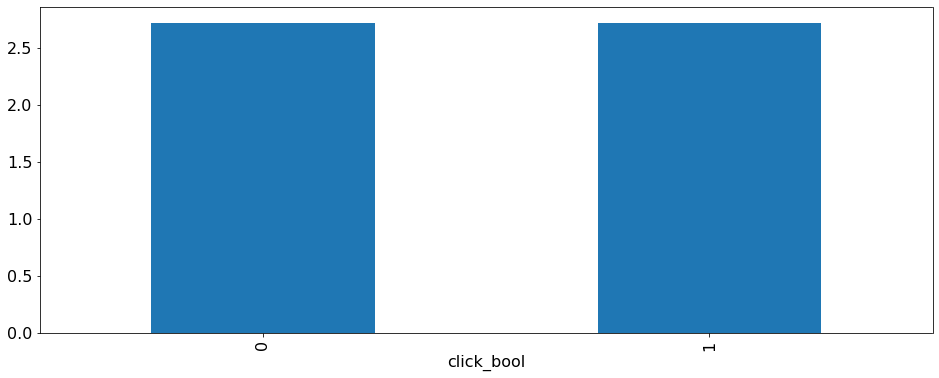

In [177]:
df['srch_query_affinity_score'] = np.exp(df['srch_query_affinity_score'])
df.groupby('click_bool')['srch_query_affinity_score'].mean().plot.bar()

# PCA

In [117]:
# find all features (columns of the test set)
all_features = list(df.columns)
all_features.remove('booking_bool')
all_features.remove('click_bool')
all_features.remove('position')
all_features.remove('gross_bookings_usd')

#also remove time
all_features.remove('date_time')

In [118]:
from sklearn import preprocessing
df2 = pd.DataFrame(preprocessing.scale(df[all_features]), columns=all_features)

In [119]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit(df2.fillna(0))

In [120]:
var=np.cumsum(np.round(principalComponents.explained_variance_ratio_, decimals=3)*100)
var

array([10.4, 19.4, 25.2, 30.7, 35.6, 39.6, 43.4, 47.1, 50.7, 54.2, 57.6,
       60.9, 64.1, 67.2, 69.9, 72.5, 75. , 77.3, 79.5, 81.7, 83.7, 85.5,
       87.3, 88.8, 90.2, 91.5, 92.6, 93.6, 94.5, 95.3, 95.9, 96.3, 96.7,
       97.1, 97.4, 97.7, 98. , 98.3, 98.5, 98.7, 98.9, 99.1, 99.2, 99.3,
       99.4, 99.5, 99.6, 99.7, 99.8, 99.9, 99.9])

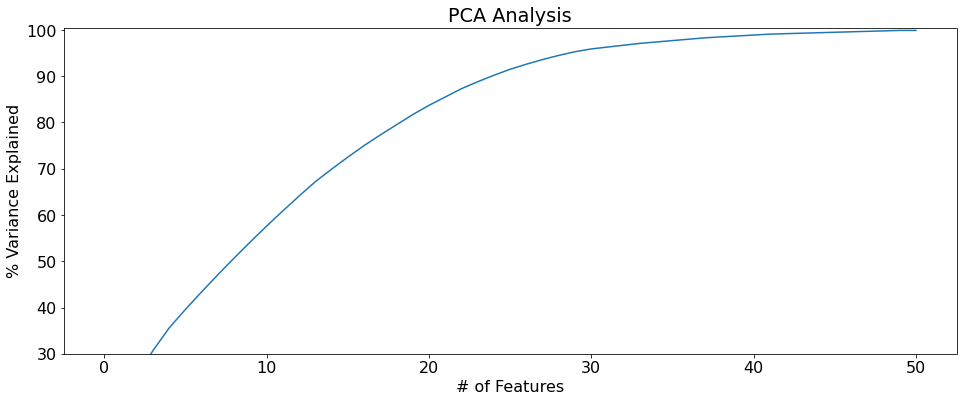

In [121]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [122]:
components = pd.DataFrame(pca.components_,columns=all_features)

In [123]:
sorted_components = components.copy()
#sorted_components.columns = all_features
#
for i,row in components.iterrows():
    sorted_components.loc[i] = row.sort_values(ascending=False).index
    #dict(row.sort_values(ascending=False))

In [126]:
# list feature of 5 most important components
sorted_components[:5]

srch_id                      site_id  \
0       price_per_trip                    price_usd   
1      prop_country_id  visitor_location_country_id   
2    prop_review_score              prop_starrating   
3    srch_adults_count              srch_room_count   
4  srch_length_of_stay                  random_bool   

  visitor_location_country_id      visitor_hist_starrating  \
0               price_per_day              prop_starrating   
1             prop_brand_bool     srch_saturday_night_bool   
2             prop_brand_bool    prop_log_historical_price   
3         srch_children_count          srch_booking_window   
4         srch_booking_window  visitor_location_country_id   

   visitor_hist_adr_usd      prop_country_id                    prop_id  \
0  prop_location_score1              site_id  orig_destination_distance   
1         price_per_day            price_usd             price_per_trip   
2  prop_location_score1    srch_adults_count            srch_room_count   
3           random_bool  srch_length_of_stay            prop_country_id   
4       prop_country_id      prop_brand_bool  orig_destination_distance   

             prop_starrating            prop_review_score  \
0        srch_booking_window    prop_log_historical_price   
1        srch_children_count            prop_review_score   
2            prop_country_id  visitor_location_country_id   
3  orig_destination_distance                    comp3_inv   
4        srch_children_count    prop_log_historical_price   

       prop_brand_bool  ...    comp6_inv      comp6_rate_percent_diff  \
0  srch_length_of_stay  ...    comp4_inv                    comp5_inv   
1            comp5_inv  ...  random_bool    prop_log_historical_price   
2       promotion_flag  ...    comp2_inv    orig_destination_distance   
3            price_usd  ...   comp8_rate  visitor_location_country_id   
4    prop_review_score  ...    comp8_inv                      srch_id   

             comp7_rate                 comp7_inv    comp7_rate_percent_diff  \
0               srch_id                 comp8_inv                  comp3_inv   
1  prop_location_score2            promotion_flag  orig_destination_distance   
2        price_per_trip                 price_usd                  comp8_inv   
3   srch_destination_id  srch_saturday_night_bool             promotion_flag   
4  prop_location_score2           prop_starrating        srch_destination_id   

             comp8_rate                 comp8_inv    comp8_rate_percent_diff  \
0               prop_id  srch_saturday_night_bool            prop_brand_bool   
1       prop_starrating       srch_booking_window        srch_length_of_stay   
2             comp3_inv             price_per_day        srch_destination_id   
3  prop_location_score2      prop_location_score1  prop_log_historical_price   
4  prop_location_score1                   site_id          srch_adults_count   

                 price_per_day            price_per_trip  
0  visitor_location_country_id           prop_country_id  
1         prop_location_score1                   site_id  
2                  random_bool                   site_id  
3            prop_review_score           prop_starrating  
4              srch_room_count  srch_saturday_night_bool  

[5 rows x 51 columns]

# Plots

# Remarks about data distributions